In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from IPython.display import display

plt.style.use("dark_background")

In [2]:
dataset_path = "../observations.csv"
take_off_distance = 'take_off_distance'
jump_status = 'jump_status'

observations = pd.read_csv(dataset_path)

In [3]:
display(observations.shape)
observations

(233, 2)

,take_off_distance,jump_status
0,47.0,1
1,47.0,1
2,47.0,1
3,159.0,1
4,47.0,1
...,...,...
228,255.0,0
229,255.0,0
230,255.0,0
231,255.0,0


In [4]:
observations[jump_status].value_counts()

jump_status
1    206
0     27
Name: count, dtype: int64

<Axes: xlabel='take_off_distance', ylabel='jump_status'>

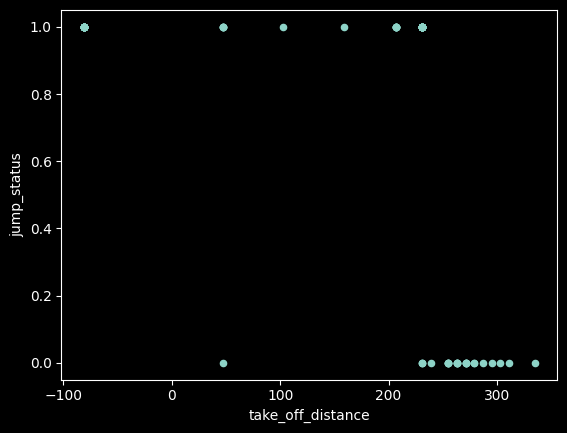

In [5]:
observations.plot.scatter(x=take_off_distance, y=jump_status)

In [6]:
model = LogisticRegression()
model.fit(observations[[take_off_distance]], observations[jump_status])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


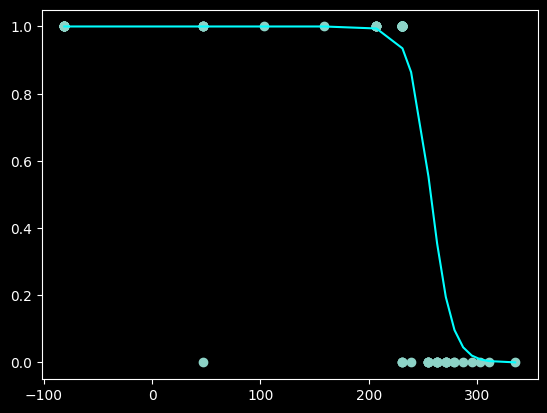

In [7]:
# draw the sigmoid equation 
w, b = model.coef_[0][0], model.intercept_[0]
x = observations[take_off_distance].sort_values().values
y = 1 / (1 + np.exp(-(w * x + b)))

plt.plot(x, y, color='cyan')    
plt.scatter(observations[take_off_distance], observations[jump_status])

In [12]:
joblib.dump(model, "../generations/generation_1.pkl")
print("The model saved successfully.")

The model saved successfully.


In [8]:
dino_ai = joblib.load("../generations/generation_2.pkl")

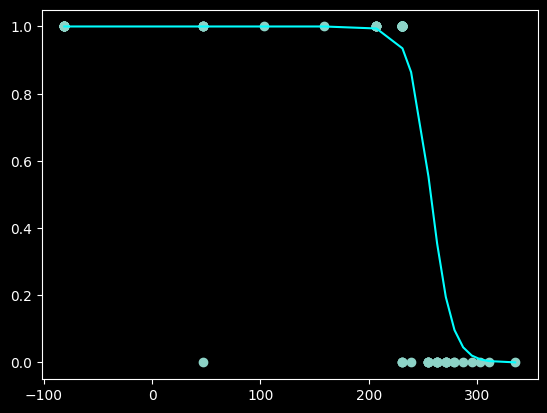

In [11]:
# plot the same as above

w, b = dino_ai.coef_[0][0], dino_ai.intercept_[0]
x = observations[take_off_distance].sort_values().values
y = 1 / (1 + np.exp(-(w * x + b)))
plt.plot(x, y, color='cyan')    
plt.scatter(observations[take_off_distance], observations[jump_status])